In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

# 1. KFold와 StratifiedKFold 의 차이점에 대해 밝히고, 아래 데이터셋을 시각화 혹은 분석 후 어떤 교차검증방식이 더 올바를지 서술하시오.

- 타겟변수 : class
- 단, 10 이상의 차이도 매우 큰 것으로 간주


In [2]:
# 데이터준비

from sklearn.datasets import load_wine
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
sy = pd.Series(wine.target, dtype="category")
sy = sy.cat.rename_categories(wine.target_names)
df['class'] = sy
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


In [3]:
class_count = df['class'].value_counts()
class_count

class_1    71
class_0    59
class_2    48
Name: class, dtype: int64

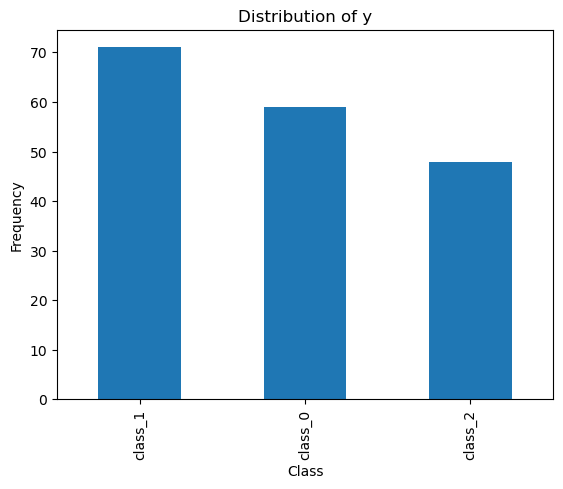

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
class_count.plot(kind='bar', ax=ax)
ax.set_title('Distribution of y')
ax.set_xlabel('Class')
ax.set_ylabel('Frequency')
plt.show()

클래스가 비교적 불균형적이라고 판단 > Stratified kfold 써도 될 것 같다.

# 2번 results의 값에 nan이 나오는 이유에 대해 서술하고, 이를 해결하는 방법과 예시코드를 구현해보시오.

In [5]:
# 데이터 준비
iris= load_iris()
X,y = iris.data, iris.target

clf = RandomForestClassifier(random_state=111)

scoring=['accuracy','precision','recall','f1']
results= cross_validate(clf, X,y, cv=5, scoring=scoring, return_train_score=True)

In [6]:
results

{'fit_time': array([0.11088181, 0.10808396, 0.11429   , 0.11844897, 0.12556791]),
 'score_time': array([0.0136261 , 0.00935602, 0.01050401, 0.01139307, 0.01031613]),
 'test_accuracy': array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ]),
 'train_accuracy': array([1., 1., 1., 1., 1.]),
 'test_precision': array([nan, nan, nan, nan, nan]),
 'train_precision': array([nan, nan, nan, nan, nan]),
 'test_recall': array([nan, nan, nan, nan, nan]),
 'train_recall': array([nan, nan, nan, nan, nan]),
 'test_f1': array([nan, nan, nan, nan, nan]),
 'train_f1': array([nan, nan, nan, nan, nan])}

- 이유 : 타겟변수가 다중클래스를 가짐
- 해결방법: 각 클래스를 개별적으로 계산 후 평균값으로 나타내는 Macro 사용

In [7]:
from sklearn.model_selection import train_test_split

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForestClassifier 초기화
clf = RandomForestClassifier(random_state=111)

# 교차 검증 수행
scoring=['accuracy','precision','recall','f1']
results = cross_validate(clf, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)

In [8]:
results

{'fit_time': array([0.12561798, 0.14271092, 0.12040305, 0.11626601, 0.10448909]),
 'score_time': array([0.01193404, 0.0111239 , 0.01117897, 0.01040268, 0.00972486]),
 'test_accuracy': array([0.95833333, 0.95833333, 0.83333333, 1.        , 0.95833333]),
 'train_accuracy': array([1., 1., 1., 1., 1.]),
 'test_precision': array([nan, nan, nan, nan, nan]),
 'train_precision': array([nan, nan, nan, nan, nan]),
 'test_recall': array([nan, nan, nan, nan, nan]),
 'train_recall': array([nan, nan, nan, nan, nan]),
 'test_f1': array([nan, nan, nan, nan, nan]),
 'train_f1': array([nan, nan, nan, nan, nan])}

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

# 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RandomForestClassifier 초기화
clf = RandomForestClassifier(random_state=111)

# 교차 검증 수행
scoring=['accuracy','precision_macro','recall_macro','f1_macro'] # 다중클래스로 지정
results = cross_validate(clf, X_train, y_train, cv=5, scoring=scoring, return_train_score=True)

In [10]:
results

{'fit_time': array([0.14178801, 0.11087012, 0.12933612, 0.10758018, 0.12796903]),
 'score_time': array([0.01108193, 0.01089096, 0.00973582, 0.01147771, 0.01901793]),
 'test_accuracy': array([0.95833333, 0.95833333, 0.83333333, 1.        , 0.95833333]),
 'train_accuracy': array([1., 1., 1., 1., 1.]),
 'test_precision_macro': array([0.96666667, 0.96296296, 0.84444444, 1.        , 0.96296296]),
 'train_precision_macro': array([1., 1., 1., 1., 1.]),
 'test_recall_macro': array([0.95238095, 0.95833333, 0.83333333, 1.        , 0.95833333]),
 'train_recall_macro': array([1., 1., 1., 1., 1.]),
 'test_f1_macro': array([0.95681511, 0.95816993, 0.83068783, 1.        , 0.95816993]),
 'train_f1_macro': array([1., 1., 1., 1., 1.])}

# 3번 : 빈칸에 알맞은 단어들을 넣어서 결과를 보이시오.

- 오차행렬, 정확도, 정밀도, 재현율을 구하는 코드

In [11]:
df =sns.load_dataset('titanic')

df_sp=df[['survived','pclass','age','sibsp','parch','fare']]
df_sp.dropna(inplace=True)

X_train, X_test, y_train, y_test = train_test_split(df_sp.drop('survived',axis=1), df_sp['survived'], test_size=0.3, random_state=111)

In [12]:
#### 문제 ####
def get_clf_eval(y_test, pred):
    ---- = ---- (y_test, pred)
    ---- = ---- (y_test, pred)
    ---- = ---- (y_test, pred)
    ---- = ---- (y_test, pred)
    print('오차 행렬')
    print( ---- )
    print('정확도: {0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}'.format(----, ----, ----))

lr_clf = LogisticRegression(solver='liblinear')

lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

SyntaxError: invalid syntax (119172498.py, line 3)

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

def get_clf_eval(y_test, pred):
    # 오차 행렬
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}'.format(accuracy, precision, recall))

In [14]:
lr_clf = LogisticRegression(solver='liblinear')

lr_clf.fit(X_train,y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test, pred)

오차 행렬
[[110  25]
 [ 43  37]]
정확도: 0.6837, 정밀도:0.5968, 재현율:0.4625


# 4번 : 빈칸에 알맞은 단어들을 넣어서 결과를 보이시오.

- 교차 검증을 사용하여 mse를 최소로 하는 최적의 k를 찾는 코드
- scoring 매개변수에는 클수록 좋은 효용 함수를 사용함 (mse의 경우, 작으면 작을수록 좋은 비용함수)

In [20]:
X,y = fetch_california_housing(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=111)

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

k_values = range(1, 20)
scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=3, scoring='neg_mean_squared_error')
    scores.append(-score.mean())

optimal_k = k_values[scores.index(max(scores))]
print(f'Optimal K: {optimal_k}')


Optimal K: 1


In [22]:
scores

[1.7052816667158428,
 1.3684309674195374,
 1.2716640455831056,
 1.225108112130881,
 1.2074929788579556,
 1.200944188861086,
 1.194642216296615,
 1.1893235655117664,
 1.1890285590959737,
 1.190243262621957,
 1.195135142956049,
 1.2004987688592974,
 1.2045726253377238,
 1.2068808839248497,
 1.2114161279164835,
 1.2162388210390154,
 1.220868792274132,
 1.2221701975578163,
 1.2233110915421397]